# Linear Regression: Caffeine Intake vs. Class Participation

### Introduction and Theory

**Linear Regression** models the linear relationship between an independent variable $x$ and a dependent variable $y$. The goal is to find the **Line of Best Fit** that predicts $y$ based on $x$ with the least amount of error.

#### The Linear Model
The model predicts values using the linear equation:
$$y = mx + b$$
* **Slope**: $m$
* **Intercept**: $b$

#### Optimizing the Fit: Sum of Squared Errors
To find the best line, the algorithm minimizes the **Sum of Squared Errors (SSE)**, which is the sum of the squared differences between the observed data $y_i$ and the model's predictions $\hat{y}_i$:

$$\text{SSE} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} (y_i - (mx_i + b))^2$$

#### Calculating the Parameters
Using the **Least Squares Method**, we calculate the exact slope and intercept that minimize the SSE:

$$m = \frac{n \sum (xy) - \sum x \sum y}{n \sum (x^2) - (\sum x)^2}$$

$$b = \frac{\sum y - m \sum x}{n}$$

#### Evaluating Performance: Coefficient of Determination $R^2$
The $R^2$ score measures how well the model replicates observed outcomes. It compares the model's error ($\text{SSE}$) to the Total Variance ($\text{Var}$) in the data:

$$R^2 = 1 - \frac{\text{SSE}}{\text{Var}} \quad \text{where} \quad \text{Var} = \sum_{i=1}^{n} (y_i - \bar{y})^2$$

* **$R^2 = 1$**: Good prediction.
* **$R^2 = 0$**: Poor prediction.

### Libraries Import

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Data Preperation

In [21]:
# Creating the dataset using a dictionary
data = {
    "Student": ["Jeremy", "Noah", "Alyssa", "Daniel", "Sofia", "Colin", "Gracie", "Anne", "Jamal", "Trisha"],
    "Caffeine Intake (mg)": [0, 100, 150, 40, 250, 120, 300, 175, 210, 80],
    "Class Participation": [0.5, 1.5, 2.5, 1.0, 4.0, 2.0, 4.5, 2.5, 3.0, 1.5]
}

# DataFrame Conversion
df = pd.DataFrame(data)

# Displaying the data
print("Student Data:")
display(df)

Student Data:


,Student,Caffeine Intake (mg),Class Participation
0,Jeremy,0,0.5
1,Noah,100,1.5
2,Alyssa,150,2.5
3,Daniel,40,1.0
4,Sofia,250,4.0
5,Colin,120,2.0
6,Gracie,300,4.5
7,Anne,175,2.5
8,Jamal,210,3.0
9,Trisha,80,1.5


### Model Training

In [22]:
# Variable Extraction
X = df["Caffeine Intake (mg)"].values
y = df["Class Participation"].values
n = len(X)

# Sum Calculation
sum_x = np.sum(X)
sum_y = np.sum(y)
sum_xy = np.sum(X * y)
sum_x2 = np.sum(X ** 2)

# Slope Calculation
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)

# Intercept Calculation
b = (sum_y - m * sum_x) / n

# Displaying the results
print("Model Training Complete!")
print(f"Slope: {m:.4f}")
print(f"Intercept: {b:.4f}")
print(f"Equation: y = {m:.4f}x + {b:.4f}")

Model Training Complete!
Slope: 0.0135
Intercept: 0.3805
Equation: y = 0.0135x + 0.3805


### Visualizing the Regression Line

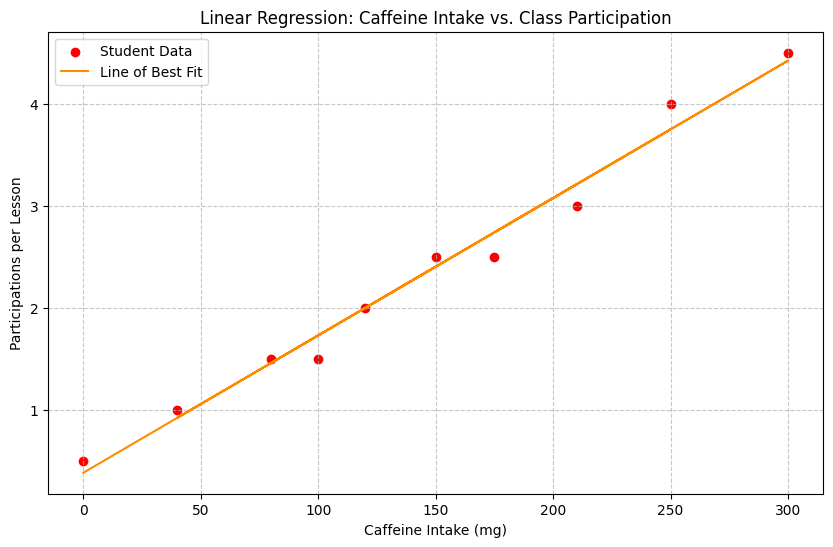

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="red", label="Student Data")
regression_line = m * X + b
plt.plot(X, regression_line, color="darkorange", label="Line of Best Fit")
plt.xlabel("Caffeine Intake (mg)")
plt.ylabel("Participations per Lesson")
plt.title("Linear Regression: Caffeine Intake vs. Class Participation")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

### Model Evaluation

In [24]:
# Calculating the predictions
predictions = m * X + b

# Calculating the squared errors
squared_errors = (y - predictions) ** 2

# Calculating the sum of squared errors
sse = np.sum(squared_errors)

# Calculating the coefficient of determination
total_variance = np.sum((y - np.mean(y)) ** 2)
r2_score = 1 - (sse / total_variance)

print(f"Sum of Squared Errors (SSE): {sse:.4f}")
print(f"Coefficient of Determination (R²): {r2_score:.4f}")

Sum of Squared Errors (SSE): 0.2541
Coefficient of Determination (R²): 0.9826


### User Prediction

Caffeine Intake: 120.0 mg
Participations per Lesson: 2.00


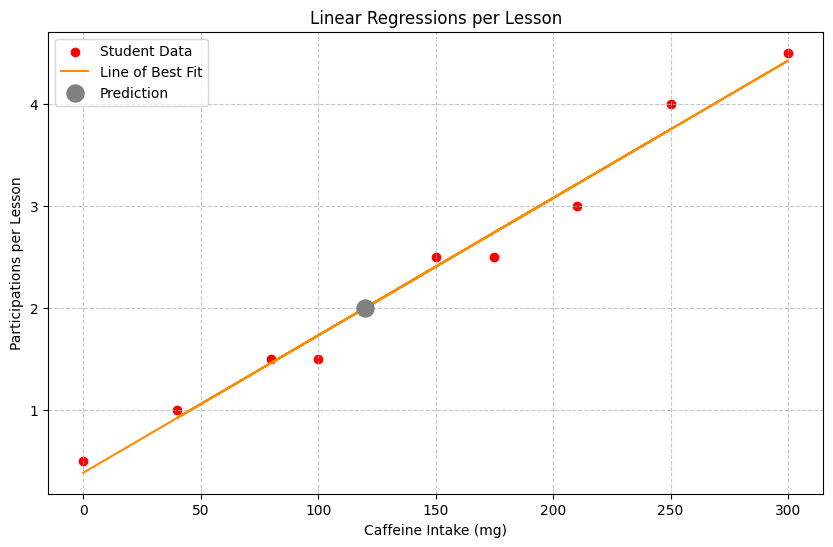

In [37]:
# User Input
input_caffeine = 120.0

# Calculating the predicted participation
predicted_participation = m * input_caffeine + b

print(f"Caffeine Intake: {input_caffeine} mg")
print(f"Participations per Lesson: {predicted_participation:.2f}")

# Plotting the result
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="red", label="Student Data")
plt.plot(X, m * X + b, color="darkorange", label="Line of Best Fit")
plt.scatter([input_caffeine], [predicted_participation], color="grey", s=150, zorder=5, label="Prediction")

plt.xlabel("Caffeine Intake (mg)")
plt.ylabel("Participations per Lesson")
plt.title("Linear Regressions per Lesson")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()